In [1]:
import kagglehub

path = kagglehub.dataset_download("sabari50312/fundus-pytorch")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fundus-pytorch' dataset.
Path to dataset files: /kaggle/input/fundus-pytorch


In [2]:
from fastai.vision.all import *

In [3]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=parent_label,
                   item_tfms=Resize(224),
                   batch_tfms = Normalize.from_stats(*imagenet_stats))

In [4]:
dls = dblock.dataloaders(path, bs=64)

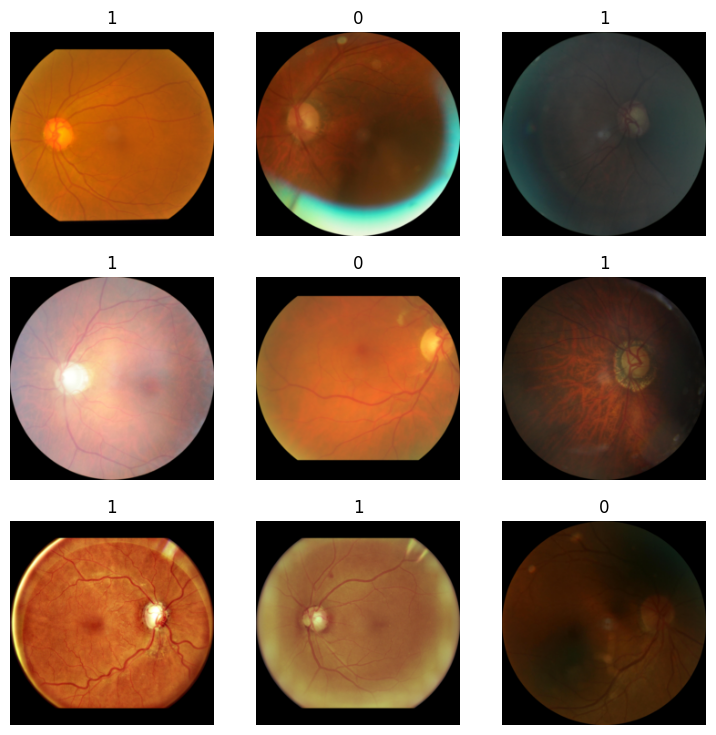

In [5]:
dls.show_batch()

In [6]:
metrics = [
    accuracy,
    Precision(average='macro'),
    Recall(average='macro'),
    F1Score(average='macro'),
]

In [7]:
learner = vision_learner(dls, resnet50, metrics=metrics).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 217MB/s]


/usr/local/lib/python3.12/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.12/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.002511886414140463)

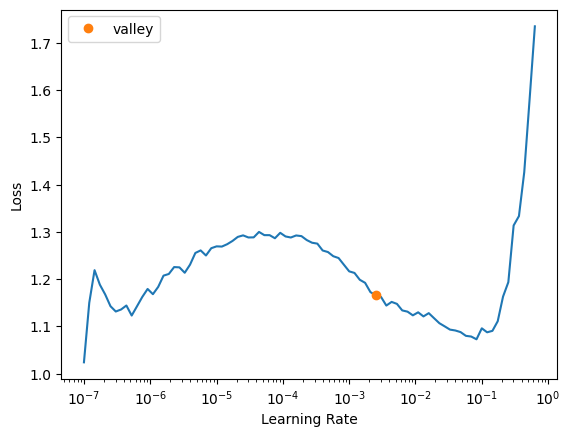

In [8]:
learner.lr_find()

In [9]:
learner.fit_one_cycle(15, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.738860,0.444171,0.826566,0.817528,0.817003,0.817262,03:42
1,0.516738,0.344560,0.863979,0.862790,0.848118,0.854058,03:21
2,0.380241,0.296451,0.876450,0.875047,0.862683,0.867883,03:23
3,0.287749,0.247274,0.898202,0.902550,0.882370,0.890307,03:23
4,0.235631,0.213111,0.916183,0.913177,0.909777,0.911402,03:23
5,0.199563,0.187387,0.928654,0.926132,0.923248,0.924638,03:25
6,0.143139,0.153249,0.947506,0.946426,0.942753,0.944511,03:23
7,0.111004,0.137987,0.955046,0.954300,0.950828,0.952496,03:25
8,0.093230,0.128050,0.963747,0.963262,0.960261,0.961712,03:23
9,0.080326,0.127572,0.966067,0.964943,0.963524,0.964222,03:21


In [11]:
learner.export('export.pkl')

In [12]:
from google.colab import files

files.download('export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>